<a href="https://colab.research.google.com/github/arielle00/CMPE252-AI/blob/main/Homework3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [27]:
A = np.array([[1.00049, .0100016],
                  [.098016, 1.00049]])

B = np.array([[0.01], [0.0005]])

In [28]:
u = 0

# QUESTION 1&2
def pendulum_dynamics(x):

  for t in range(1,500):
    new_state = np.dot(A, x[t-1]) + np.dot(B, u)
    x.append(new_state)

  angles = [state[0] for state in x]
  angle_velocities =  [state[1] for state in x]

  plt.plot(angles, label='Theta (angle)')
  plt.plot(angle_velocities, label='Theta dot (angular velocity)')
  plt.xlabel('Time Iteration')
  plt.ylabel('Value')
  plt.legend()
  plt.title('Pendulum Dynamics Over Time')
  plt.grid(True)
  plt.show()

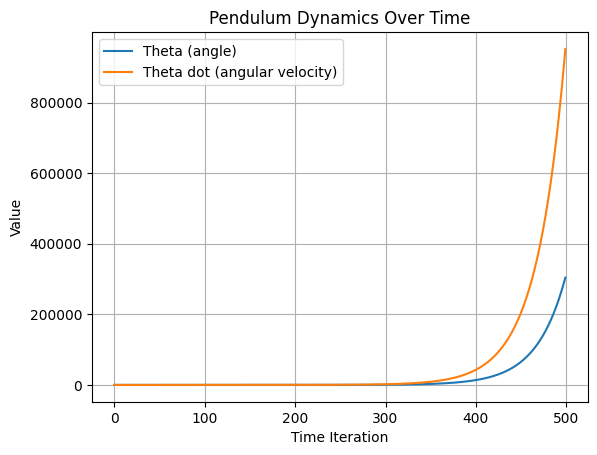

In [29]:
x = [np.array([[0.1], [0.0]])]
pendulum_dynamics(x)

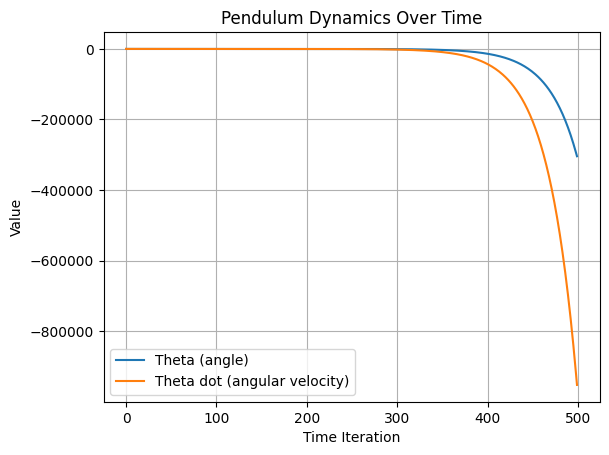

In [30]:
x = [np.array([[-0.1], [0.0]])]
pendulum_dynamics(x)

In [31]:
# QUESTION 5
P=None

def optimal_value(alpha):
  global P
  R = np.array([[0.1]])
  # alpha = 0.001

  Q = alpha * np.identity(2)

  K = np.zeros((499, 2))

  P = [np.zeros((2, 2)) for _ in range(500)]
  P[-1] = Q

  u = 0.0

  angle = 0.1
  angle_vel = 0.0

  x = np.zeros((500, 2))
  x[0] = [angle, angle_vel]

  for t in range(498,-1, -1):
      AT = np.transpose(A)
      BT = np.transpose(B)

      part1 = np.linalg.multi_dot([AT, P[t+1], A])
      part2 = np.linalg.multi_dot([AT, P[t+1], B])
      part3 = np.linalg.multi_dot([BT, P[t+1], B])
      part4 = np.linalg.multi_dot([BT, P[t+1], A])

      P[t] = Q + part1 - np.linalg.multi_dot([part2, np.linalg.inv(R + part3), part4])


  for t in range(0, 499):
      term_to_invert = R + np.linalg.multi_dot([B.T, P[t + 1], B])
      invert_term = np.linalg.inv(term_to_invert)
      K[t] = -np.linalg.multi_dot([invert_term, B.T, P[t + 1], A])


  for t in range(0, 499):
      u = np.dot(K[t], x[t])
      new_state = np.dot(A, x[t]) + np.dot(B, np.array([u]))
      x[t + 1] = new_state

  angle = x[:,0]
  angle_vel = x[:,1]

  plt.figure()
  plt.plot(angle, label='Theta (angle)')
  plt.plot(angle_vel, label='Theta dot (angular velocity)')
  plt.xlabel('Time')
  plt.ylabel('Values')
  plt.legend()
  plt.title('Pendulum Dynamics Over Time')
  plt.show()

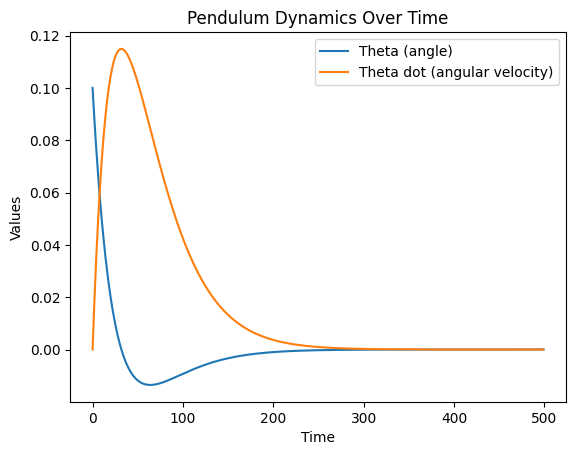

In [32]:
optimal_value(0.001)

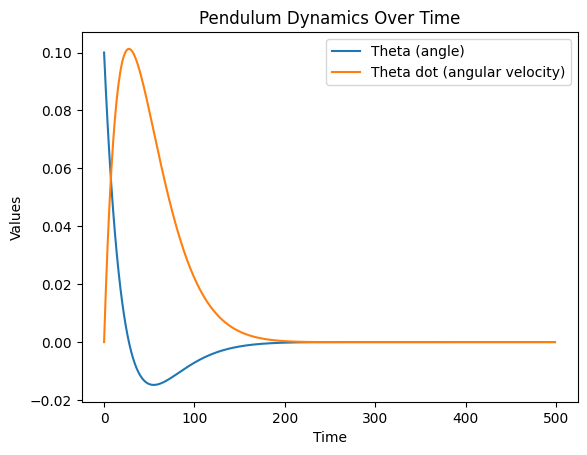

In [33]:
optimal_value(0.1)

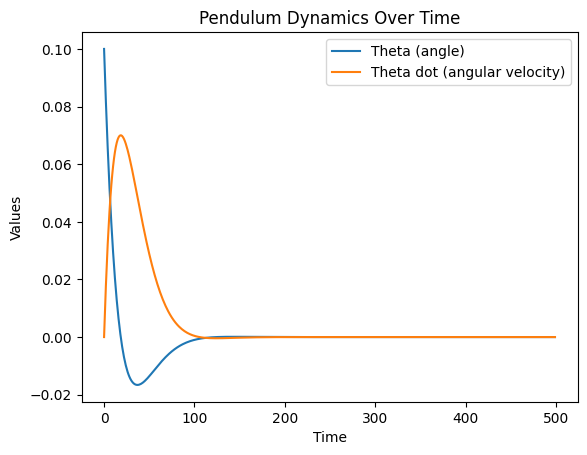

In [34]:
optimal_value(1)

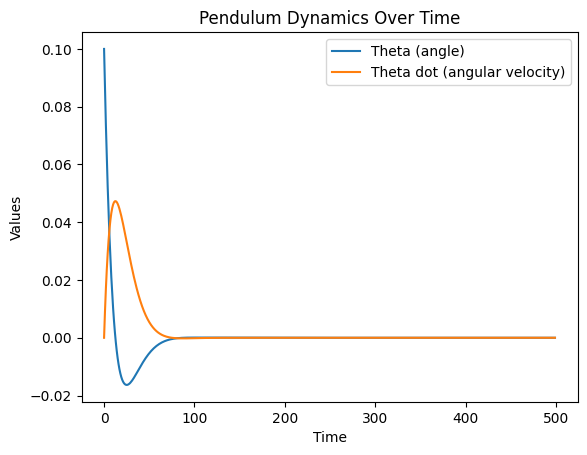

In [35]:
optimal_value(5)

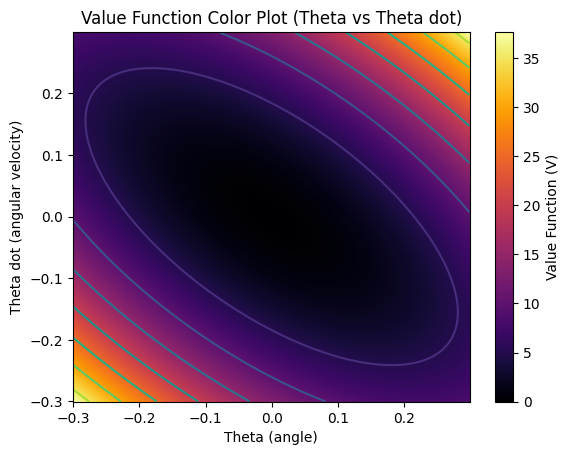

In [68]:
#BONUS

# print(x)
theta = np.arange(-0.3, 0.3, 0.001)
theta_dot = np.arange(-0.3, 0.3, 0.001)
V_grid = np.zeros((len(theta), len(theta_dot)))


for i, angle in enumerate(theta):
    for j, vel in enumerate(theta_dot):
      x = np.array([angle, vel])
      V_grid[i, j] = np.dot(np.dot(x.T, P[0]), x)


plt.figure()
plt.pcolormesh(theta, theta_dot, V_grid, cmap='inferno')
plt.xlabel('Theta (angle)')
plt.ylabel('Theta dot (angular velocity)')
plt.title('Value Function Color Plot (Theta vs Theta dot)')
plt.colorbar(label='Value Function (V)')
plt.contour(theta, theta_dot, V_grid)

plt.show()


